In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os
import pickle
import tqdm
import tqdm.notebook

In [5]:
%matplotlib inline
sns.set(rc={"figure.dpi":100, 'savefig.dpi':100})
sns.set_context('notebook')

In [6]:
# File paths
OUT_VEL_FILE = '../feature_data/output_velocities.csv'

# Keys to the pickle objects
CITY = 'city'
LANE = 'lane'
LANE_NORM = 'lane_norm'
SCENE_IDX = 'scene_idx'
AGENT_ID = 'agent_id'
P_IN = 'p_in'
V_IN = 'v_in'
P_OUT = 'p_out'
V_OUT = 'v_out'
CAR_MASK = 'car_mask'
TRACK_ID = 'track_id'

# Column headers in the CSV files
WAS_TARGET = 'was_target'
V_OUT_X = ['v_out_x' + str(i) for i in range(1, 31)]
V_OUT_Y = ['v_out_y' + str(i) for i in range(1, 31)]

In [7]:
def plot_hist(x, y, bins, title, palette, xlbl, ylbl, fname):
    """
    Plots a histogram of the two arrays x and y.
    """
    fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
    sns.set_palette(palette)
    sns.histplot(ax=ax1, x=x, y=y, bins=bins, cbar=True)
    ax1.set_xlabel(xlbl)
    ax1.set_ylabel(ylbl);
    ax1.set_title(title);
    plt.savefig(fname)

# Distribution of output velocities (training)

In [8]:
df = pd.read_csv(OUT_VEL_FILE)

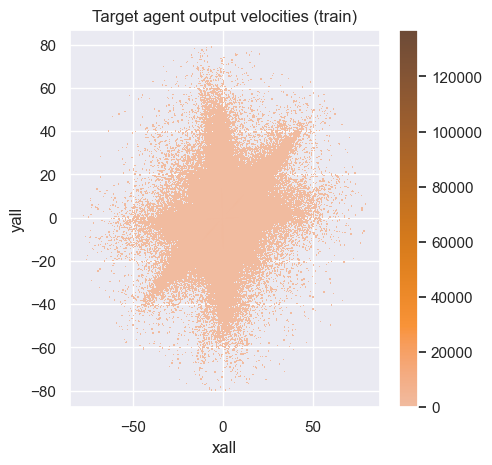

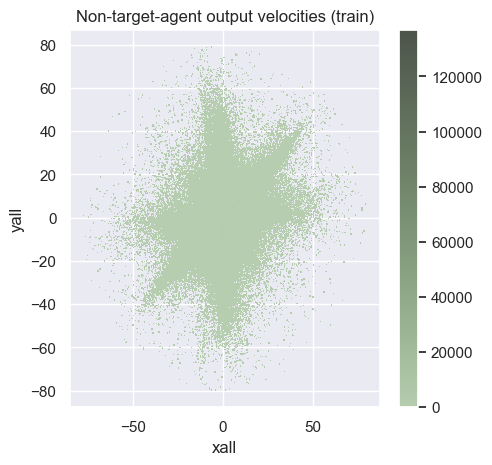

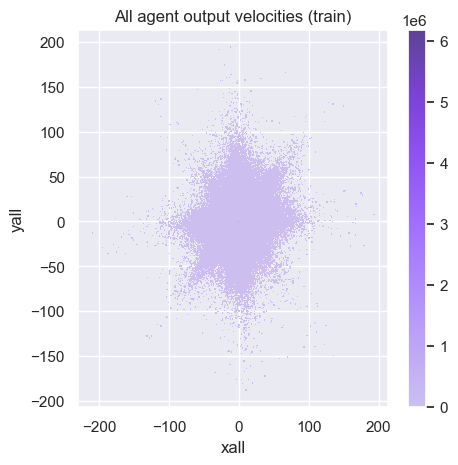

In [9]:
# Get output velocities by group
xtarg = df[df[WAS_TARGET] == 1][V_OUT_X].to_numpy()
xtarg = xtarg.reshape(xtarg.shape[0] * xtarg.shape[1])
ytarg = df[df[WAS_TARGET] == 1][V_OUT_Y].to_numpy()
ytarg = ytarg.reshape(ytarg.shape[0] * ytarg.shape[1])

xnon = df[df[WAS_TARGET] == 0][V_OUT_X].to_numpy()
xnon = xnon.reshape(xnon.shape[0] * xnon.shape[1])
ynon = df[df[WAS_TARGET] == 0][V_OUT_Y].to_numpy()
ynon = ynon.reshape(ynon.shape[0] * ynon.shape[1])

xall = df[V_OUT_X].to_numpy()
xall = xall.reshape(xall.shape[0] * xall.shape[1])
yall = df[V_OUT_Y].to_numpy()
yall = yall.reshape(yall.shape[0] * yall.shape[1])

# Plot the positions
title = 'Target agent output velocities (train)'
palette = 'Reds'
bins = 1000
x_label, y_label = 'xall', 'yall'
fname = '../milestone_images/outVelTargTrain'
plot_hist(xtarg, ytarg, bins, title, palette, x_label, y_label, fname)

title = 'Non-target-agent output velocities (train)'
palette = 'Greens'
fname = '../milestone_images/outVelNonTrain'
plot_hist(xtarg, ytarg, bins, title, palette, x_label, y_label, fname)

title = 'All agent output velocities (train)'
palette = 'plasma'
fname = '../milestone_images/outVelTrain'
plot_hist(xall, yall, bins, title, palette, x_label, y_label, fname)